<a href="https://colab.research.google.com/github/kunjkinger/machine_learning_ztm/blob/main/heart_disease_classification_with_additional_catboost_and_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [195]:
!pip install xgboost

In [187]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 28 kB/s 


In [2]:
df = pd.read_csv('heart-disease.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

EDA

In [8]:
 df.target.value_counts() #1 is hd and 0 is not

1    165
0    138
Name: target, dtype: int64

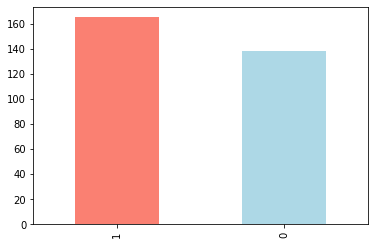

In [10]:
df.target.value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
## heart disease frequency accordinng to sex

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
#compare the target column with the sex column

In [22]:
pd.crosstab(df.target, df.sex) # 1 is male and 0 is female

sex,0,1
target,,
0,24,114
1,72,93


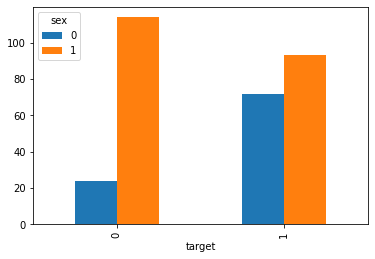

In [21]:
pd.crosstab(df.target, df.sex).plot(kind='bar')

In [23]:
#chest pain vs heart disease 0,1,2,3,4

In [24]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

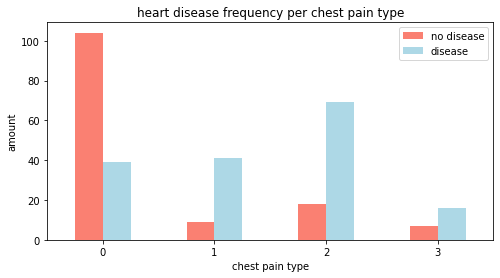

In [27]:
pd.crosstab(df.cp, df.target).plot(kind='bar',figsize=(8,4),
                                   color=['salmon','lightblue'])
plt.title('heart disease frequency per chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['no disease','disease'])
plt.xticks(rotation=0)

In [28]:
import seaborn as sns

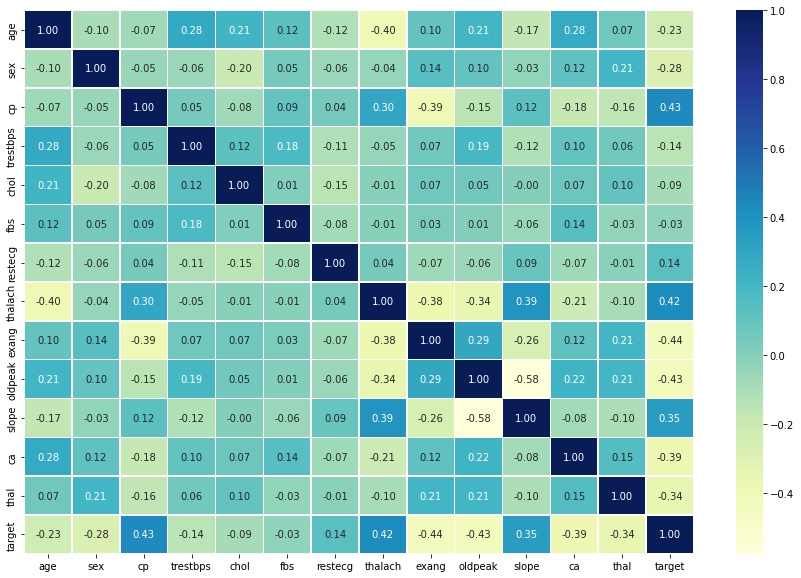

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = df.drop('target',axis=1)
y = df.target

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

In [62]:
models = {'Logistic Regression': LogisticRegression(solver='lbfgs',max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

In [63]:
def fit_and_score(model, x_train, x_test, y_train, y_test):

  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(x_train,y_train)
    model_scores[name] = model.score(x_test,y_test)

  return model_scores


In [64]:
model_scores = fit_and_score(model=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)

In [65]:
model_scores

{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.8524590163934426}

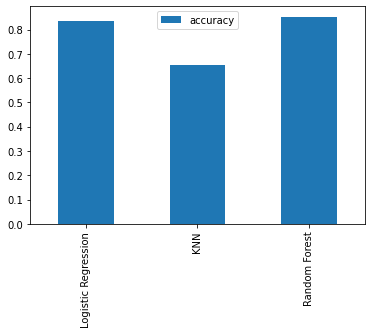

In [66]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

In [70]:
#hypertuning of the model
#feature importance
#cross-valiation
#roc curve
#auc 

In [72]:
#let's try knn

train_scores = []
test_scores = []

#create a list of different values n_neigbors
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #fit the algorithm
  knn.fit(x_train, y_train)

  #update the training scores list
  train_scores.append(knn.score(x_train,y_train))

  #update the testing scores list
  test_scores.append(knn.score(x_test, y_test))
          

In [73]:
train_scores

[1.0,
 0.7851239669421488,
 0.731404958677686,
 0.7520661157024794,
 0.7396694214876033,
 0.7355371900826446,
 0.743801652892562,
 0.7231404958677686,
 0.7024793388429752,
 0.7024793388429752,
 0.7148760330578512,
 0.7066115702479339,
 0.6942148760330579,
 0.6983471074380165,
 0.7066115702479339,
 0.7107438016528925,
 0.6942148760330579,
 0.7107438016528925,
 0.7024793388429752,
 0.6942148760330579]

In [74]:
test_scores

[0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344]

Max KNN score on the test data is: 70.49%


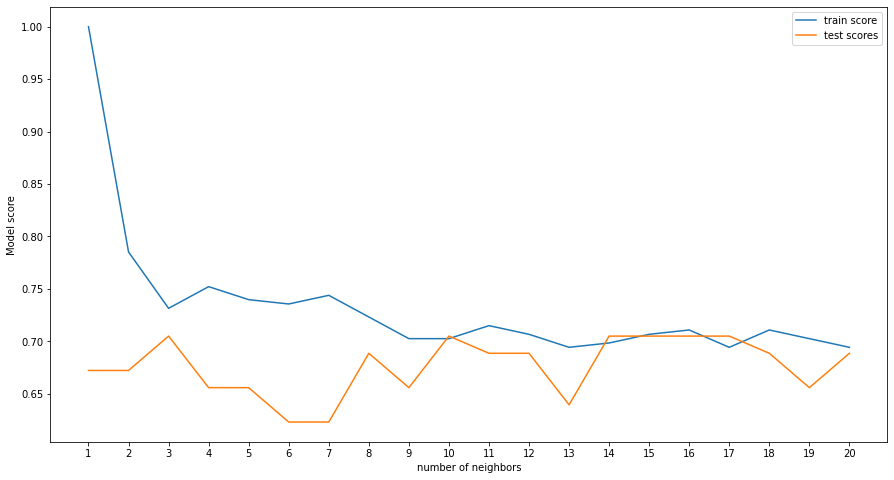

In [77]:
plt.figure(figsize=(15,8))
plt.plot(neighbors, train_scores,label='train score')
plt.plot(neighbors, test_scores, label='test scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Max KNN score on the test data is: {max(test_scores) * 100:.2f}%')

In [78]:
#hyperparameter tuning with randomized search cv

In [88]:
#create a hyperparameter grid for logisitc regression

log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}

#for randomforest
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [83]:
#tune logistic regrression

np.random.seed(42)

#setup random hyperparameter search for Logistic Regeression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [84]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [85]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

In [89]:
#tune random forest
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [90]:
rs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 12,
 'n_estimators': 310}

In [91]:
rs_rf.score(x_test,y_test)

0.8524590163934426

In [92]:
#hyperparameter tuning grid search


In [97]:
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver':['liblinear']}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

In [98]:
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [99]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [100]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

In [101]:
model_scores

{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.8524590163934426}

In [126]:
rf_grid = {'n_estimators': [100,200,500],
           'max_depth':[None],
           'min_samples_split':[6],
           'min_samples_leaf': [1,2]}

In [127]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True)

In [128]:
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [129]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [130]:
gs_rf.score(x_test,y_test)

0.8524590163934426

In [132]:
y_preds = gs_log_reg.predict(x_test)

In [133]:
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [146]:
from sklearn.metrics import roc_curve, plot_roc_curve,confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_confusion_matrix
import seaborn as sns

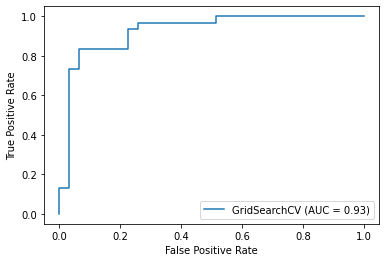

In [136]:
plot_roc_curve(gs_log_reg, x_test, y_test)

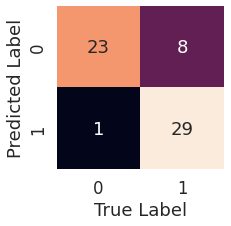

In [153]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):

  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')

plot_conf_mat(y_test,y_preds)

In [155]:
#evaluation metrics using cv
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [157]:
clf = LogisticRegression(C=0.1082636733874054,
                         solver='liblinear')

In [159]:
#cross validate accuracy
cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [161]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.834808743169399

In [162]:
cv_precision = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precision

cv_precision = np.mean(cv_precision)
cv_precision

0.8182683982683983

In [163]:
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall

cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [164]:
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1

cv_f1 = np.mean(cv_f1)
cv_f1

0.8572876223964057

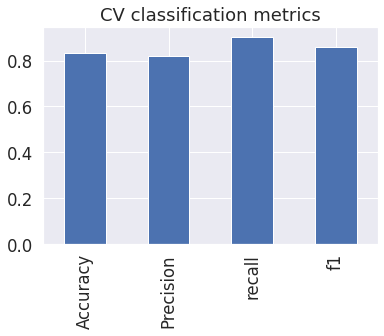

In [167]:
cv_metrics = pd.DataFrame({'Accuracy':cv_accuracy,
                           'Precision':cv_precision,
                           'recall':cv_recall,
                           'f1':cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='CV classification metrics',
                      legend=False)

In [168]:
#feature importance

In [171]:
gs_log_reg.best_params_
clf = LogisticRegression(C=0.1082636733874054,
                         solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.1082636733874054, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
#check coef
clf.coef_

array([[ 0.00728048, -0.51686656,  0.66589462, -0.01487605, -0.00340645,
         0.03104055,  0.18161848,  0.02644686, -0.42354452, -0.40308078,
         0.31469644, -0.59328254, -0.5324176 ]])

In [177]:
#match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0072804839484074445,
 'ca': -0.5932825433893569,
 'chol': -0.0034064521693620634,
 'cp': 0.6658946183548233,
 'exang': -0.4235445190331682,
 'fbs': 0.031040546369903915,
 'oldpeak': -0.40308077860802066,
 'restecg': 0.18161847744860904,
 'sex': -0.5168665639698048,
 'slope': 0.31469643993626856,
 'thal': -0.5324175998455075,
 'thalach': 0.0264468639345253,
 'trestbps': -0.014876053931488975}

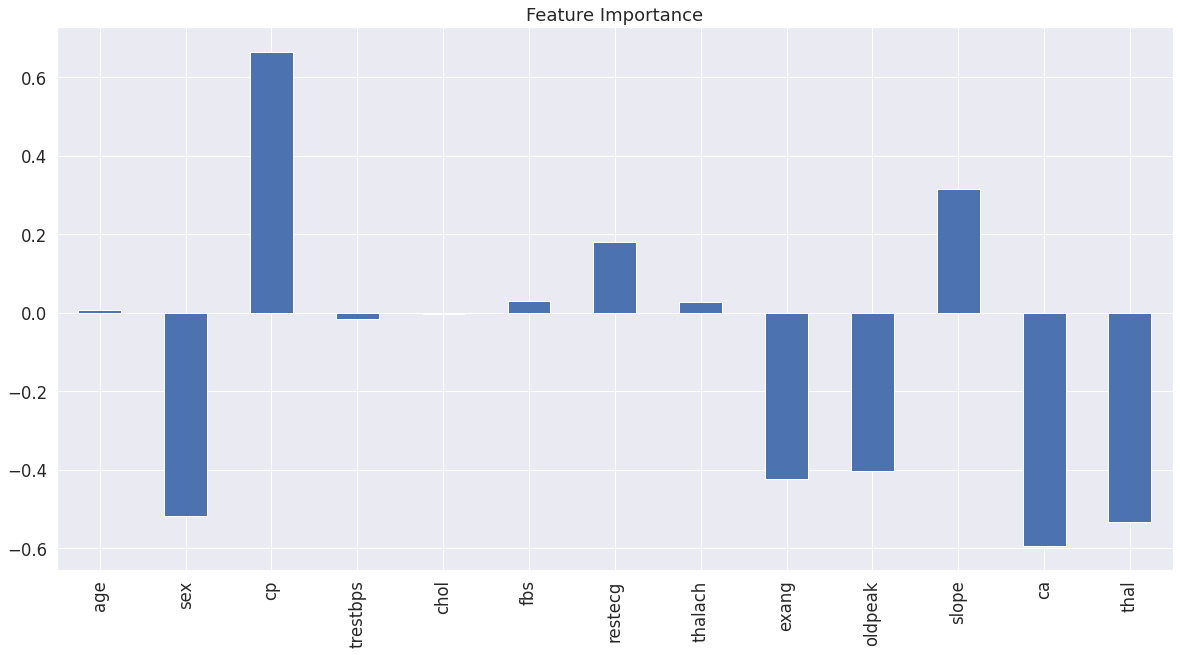

In [186]:
feature_dict = pd.DataFrame(feature_dict, index=[0])
feature_dict.T.plot.bar(title='Feature Importance', legend=False, figsize=(20,10))

In [188]:
#catboost model

In [189]:
from catboost import CatBoostClassifier

In [192]:
model = CatBoostClassifier(learning_rate=1,depth=6)

In [193]:
model.fit(x_train,y_train)

0:	learn: 0.3311006	total: 47.6ms	remaining: 47.6s
1:	learn: 0.2633163	total: 48.4ms	remaining: 24.1s
2:	learn: 0.2121953	total: 49.2ms	remaining: 16.3s
3:	learn: 0.1931068	total: 49.9ms	remaining: 12.4s
4:	learn: 0.1665508	total: 50.9ms	remaining: 10.1s
5:	learn: 0.1453318	total: 51.9ms	remaining: 8.6s
6:	learn: 0.1123029	total: 52.9ms	remaining: 7.5s
7:	learn: 0.0956790	total: 53.8ms	remaining: 6.68s
8:	learn: 0.0652079	total: 54.8ms	remaining: 6.04s
9:	learn: 0.0566224	total: 55.6ms	remaining: 5.5s
10:	learn: 0.0506406	total: 56.6ms	remaining: 5.09s
11:	learn: 0.0418659	total: 57.6ms	remaining: 4.74s
12:	learn: 0.0351172	total: 58.6ms	remaining: 4.45s
13:	learn: 0.0301653	total: 59.8ms	remaining: 4.21s
14:	learn: 0.0264437	total: 60.8ms	remaining: 3.99s
15:	learn: 0.0235332	total: 61.8ms	remaining: 3.8s
16:	learn: 0.0203395	total: 62.8ms	remaining: 3.63s
17:	learn: 0.0180570	total: 63.9ms	remaining: 3.49s
18:	learn: 0.0164025	total: 64.9ms	remaining: 3.35s
19:	learn: 0.0147478	total

In [194]:
model.score(x_test,y_test)

0.8360655737704918

In [204]:
from xgboost import XGBClassifier

In [201]:
param_dist = {'objective':'binary:logistic', 'n_estimators':2}

In [205]:
clf = XGBClassifier(**param_dist)

In [206]:
clf.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.645045	validation_1-logloss:0.65119
[1]	validation_0-logloss:0.604981	validation_1-logloss:0.611207


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [208]:
evals_result = clf.evals_result()
evals_result

{'validation_0': {'logloss': [0.645045, 0.604981]},
 'validation_1': {'logloss': [0.65119, 0.611207]}}